# Kalman Filter: Circular track

In [1]:
%pylab --no-import-all
from __future__ import division, print_function, generators
import  numpy as np
import kalman as k

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [ ]:
# %load kalman.py

import numpy as np
import matplotlib.pyplot as plt



def kalman_predict( A, # transition matrix 
            r, # measurement error matrix
            H, # transformation matrix from state vector to measurement
            p, # initial variance on prediction
            xkal, # estimated state vector
            xpredict, # predicted state vector
            xmeas): # measurements
    for i in range(1, xkal.shape[1]): # for each measurement do 
        # prediction: recursive formula
        xpredict[:, i] = np.dot(A, xkal[:, i - 1])
        # predict covariance  
        p = A*p*A.T
        # construct kalman gain matrix according to prediction equations
        # higher gain leads to higher influence of measurement,
        # lower gain to higher influence of predicion
        K = np.dot(p*H.T, np.linalg.inv(H*p*H.T + r))
        # construct estimate from prediction and gain 
        xkal[:, i] = xpredict[:, i] + K*(xmeas[:, i] - H*xpredict[:, i])
        # update covariance with gain
        p = (np.identity(K.shape[0]) - K * H) * p
    return xkal, xpredict

def plot_results(xkal, xpredict, xmeas, xtrue):
    fig1 = plt.figure()
    ax1 = plt.axes()
    plt.plot(xtrue, 'b-', label = 'True')
    plt.plot(xmeas[0].T, 'rx', label = 'Measurement')
    plt.plot(xpredict[0].T, 'g.',  label = 'Prediction')
    plt.plot(xkal[0].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('X')

    fig2 = plt.figure()
    ax2 = plt.axes()
    #plt.axhline(v)
    plt.axhline(np.mean(xmeas[1]))
    plt.plot(xpredict[1].T, 'g.',  label = 'Prediction')
    plt.plot(xmeas[1].T, 'rx', label = 'Measurement')
    plt.plot(xkal[1].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('Velocity')
    return [[fig1, fig2], [ax1, ax2]]


## Global parametrization
For simplicity take only radius of circle and some transposition of the origin along x-axis

In [4]:
dt = 0.2
# final time for track
T = 2* np.pi
# number of measurements
N = int(T / dt)
# initial position
x0 = 100
# position, velocity and acceleration
state_vec_dim = 2
# parabola with some curvature g 

# initial velocity / slope

# errors
sigma_pos = 1e-1
sigma_vel = 2
sigma_acc = 2

_t = np.linspace(0, T, N)

xtrue5  = np.matrix([np.cos(_t), np.sin(_t)])

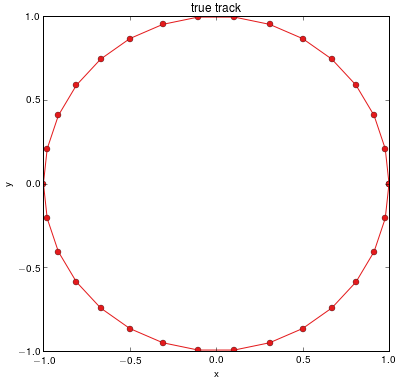

In [5]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.plot(xtrue5[0].T, xtrue5[1].T, marker='o')
plt.title('true track')
plt.xlabel('x')
plt.ylabel('y')

[[-0.00186949 -0.00165289 -0.05438036  0.02307008  0.00696089  0.12804233 -0.0141135  -0.05447923 -0.14487569 -0.08646388  0.02097936
   0.06969986 -0.03696515  0.02760423 -0.06634864  0.18776433 -0.24732138 -0.00376835  0.06230396 -0.06139495  0.06555515 -0.00390516
   0.26578517  0.06901949  0.05789526  0.10713219 -0.11219647  0.00959014  0.00096736 -0.12556745  0.08668742]
 [-0.1838165   0.05030095  0.10300939  0.01426758  0.09771109 -0.12374994 -0.01602631 -0.12783165 -0.0727591  -0.05592216  0.07441941
   0.12072717  0.06088535  0.07817896 -0.04027887 -0.05190209 -0.02829123  0.15627803 -0.01927908 -0.05610851 -0.0316539  -0.08428733
  -0.01611289 -0.01833833 -0.07083373  0.08910053  0.04905525  0.03576607  0.08972585 -0.05969728  0.11400727]]


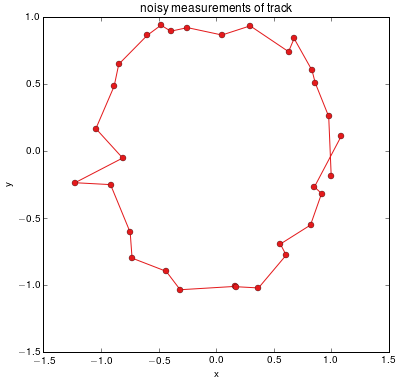

In [6]:
# add noise
measurement_noise = np.random.normal(loc=0, scale=sigma_pos, size=xtrue5.shape)
print(measurement_noise)
xmeas4 = xtrue5 + measurement_noise
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.plot(xmeas4[0].T, xmeas4[1].T, marker='o')
plt.title('noisy measurements of track')
plt.xlabel('x')
plt.ylabel('y')

[[  1.10000000e+00   1.16704371e+00   1.23450505e+00   1.09848232e+00   1.10813186e+00   9.91905258e-01   9.94136293e-01   9.74902443e-01
    9.84767620e-01   9.87981040e-01   9.93273647e-01   9.95188453e-01   1.00105905e+00   1.00039590e+00   1.00377991e+00   9.91004804e-01
    1.00527444e+00   1.00067667e+00   9.98620555e-01   1.00224422e+00   1.00253386e+00   1.00646350e+00   1.00871519e+00   1.01009460e+00
    1.01364448e+00   1.01251095e+00   1.00649695e+00   1.00547216e+00   1.00368669e+00   9.99317288e-01   1.00212613e+00]
 [  1.00000000e-01  -1.62422082e-01  -2.48082008e-01  -9.89818469e-02  -9.71045907e-02   2.68194415e-02   1.88735672e-02   2.02496211e-02
   -5.83950365e-03  -1.66904315e-02  -1.53093062e-02  -8.46670681e-03  -1.20883919e-02  -8.91323634e-03  -1.29851959e-02  -2.10090613e-04
   -1.44313571e-02  -1.43028371e-02  -1.04413638e-02  -1.23373018e-02  -8.31805830e-03  -7.10211644e-03   5.86741802e-03   8.88284059e-03
    1.15142589e-02   1.48666118e-02   8.80391994e-

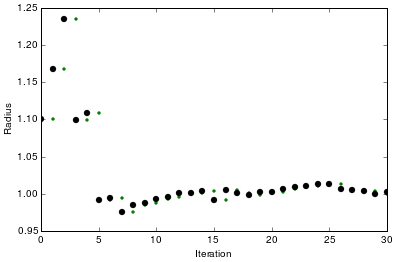

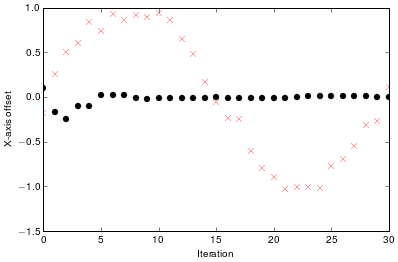

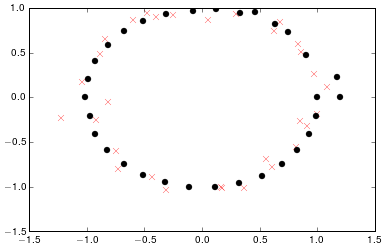

In [9]:


xpredict4 = np.matrix (np.linspace(0,T,N*state_vec_dim).reshape((state_vec_dim, N)))
xkal4 = np.matrix (np.linspace(0,T,N*state_vec_dim).reshape((state_vec_dim, N)))
# initial position -- deliberately slightly off the real values radius=1, x-offset=0
xpredict4[:,0] = xkal4[:,0] = np.array([[1.1], [0.1]]) # np.array ( [[xmeas4[0,0]   ], [xmeas4[1,0]] ] )
# initial variance on prediction
p4 = 0.5 *  np.matrix ( [[2, 0],
                  [0, 2]] )
# measurement error
r4 = 1e-1  * np.matrix([[sigma_pos, 0],
                [0, sigma_pos]])
# prediction matrix
# global track parameters do not change in this example
A5 = np.matrix ( [[1, 0],
                [0, 1]] )
# map state vector to measurements at surface k
H4_k = [np.matrix ([[np.cos(t), 1],
                 [np.sin(t), 0]] ) for t in _t]
for i in range(1,N):
    H4 = H4_k[i]
    # prediction: recursive formula
    xpredict4[:,i] = np.dot(A5, xkal4[:,i-1] )
    p4 = A5*p4*A5.T
    K4 = p4*H4.T * np.linalg.inv(H4*p4*H4.T+r4)
    _resid = (np.matrix(xmeas4[:,i]) - H4 * (xpredict4[:,i]))
    xkal4[:,i] = xpredict4[:,i] + K4 * _resid 
    p4 = (np.identity(state_vec_dim)-K4 * H4) * p4
print(xkal4)
fig1 = plt.figure()
ax1 = plt.axes()
plt.plot(xpredict4[0].T, 'g.',  label = 'Prediction')
plt.plot(xkal4[0].T, 'ko', label = 'Kalman')
plt.xlabel('Iteration')
plt.ylabel('Radius')
fig2 = plt.figure()
ax2 = plt.axes()
plt.plot(xmeas4[1].T, 'rx', label = 'Measurement')
plt.plot(xkal4[1].T, 'ko', label = 'Kalman')
plt.xlabel('Iteration')
plt.ylabel('X-axis offset')
_plot_data = np.array([H4_k[i] * (xpredict4[:, i]) for i in range(N)])
print(_plot_data.shape)

plt.figure()
ax = plt.axes
plt.plot(xmeas4[0].T, xmeas4[1].T, 'rx', label='Measurement')
for i in range(N):
    _plot_data =H4_k[i] * (xpredict4[:, i])
    plt.plot(_plot_data[0], _plot_data[1], 'ko')
